In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
tcga = pd.read_csv('TCGA_4class.csv')
tcga['y'] = tcga['y'].replace(['KIRC','KIRP','KICH'],['RC','RC','RC'])
tcga = tcga.sort_values(by='y')
tcga = tcga.sort_index(axis=0)
tcga.y.value_counts()

Normal    1706
RC         882
PRAD       492
BLCA       408
Name: y, dtype: int64

In [31]:
urine = pd.read_csv('urine_k15_140cases.csv')
urine['y'] = urine['y'].replace(['BLCA_15k','NL_15k','PRAD_15k','RCC_100k'],['BLCA','Normal','PRAD','RC'])
urine.drop(['Unnamed: 0','X'],axis=1,inplace=True)
urine = urine.sort_values(by='y')
urine = urine.sort_index(axis=0)
urine.y.value_counts()

BLCA      42
Normal    28
PRAD      23
RC        23
Name: y, dtype: int64

In [8]:
X = tcga.drop(['y'],axis=1)
lst = [i for i in urine.columns if i in X.columns]
X = tcga.loc[:,lst]
X_urine = urine.loc[:,lst]

In [18]:
from sklearn.preprocessing import minmax_scale
X = pd.DataFrame(minmax_scale(X),columns=lst)
X_urine = pd.DataFrame(minmax_scale(X_urine),columns=lst)

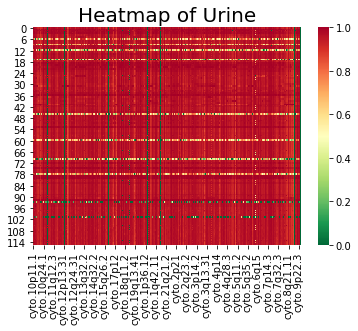

In [36]:
ax = sns.heatmap(X_urine, cmap='RdYlGn_r')
plt.title('Heatmap of Urine', fontsize=20)
plt.show() 

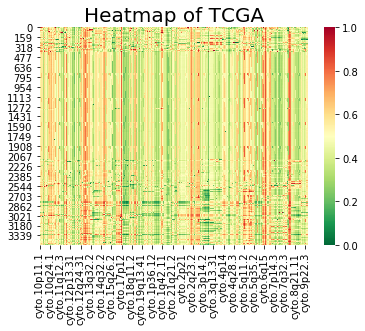

In [35]:
ax = sns.heatmap(X, cmap='RdYlGn_r')
plt.title('Heatmap of TCGA', fontsize=20)
plt.show() 

In [59]:
import operator
lst = list(urine.drop('y',axis=1).min())
index, value = min(enumerate(lst), key=operator.itemgetter(1))
print(index,value)
print(urine.columns[index])

123 -538.508
cyto.13q11


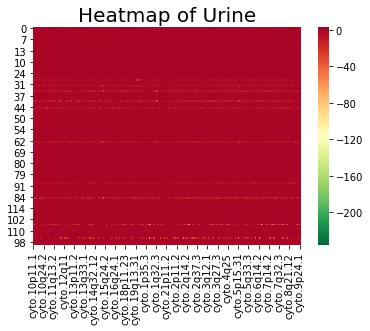

In [62]:
ax = sns.heatmap(urine.drop(['y','cyto.13q11'],axis=1), cmap='RdYlGn_r')
plt.title('Heatmap of Urine', fontsize=20)
plt.show() 